# Iteratively reweighted least squares (IRLS) 

# (1) Implement iteratively reweighted least squares (IRLS) algorithm to reproduce the result in Example 2.5 of Computation Statistics book using.

In [1]:
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import misc
from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv

Load the data:

In [2]:
df = pd.read_table("facerecognition.dat", sep="\s+")

Definition of iterative reweighted least squares (IRLS) function:

In [3]:
def IRLS(y, X, B0, maxiter, tolerance = 0.0000001):
    X=pd.DataFrame(X)
    X.insert(0,'X0',1)
    n=len(X)
    W=np.zeros(n)
    W=pd.DataFrame({ 'W' : W})
    B = pd.DataFrame(np.zeros((maxiter + 1, 2)))
    B[0][0] = B0    
    p=np.zeros(n)
    p=pd.DataFrame({ 'P' : p})
    #sc=np.zeros(n)
    #sc=pd.DataFrame({ 'sc' : sc})
    Hess=[]
    itr=0
    print( (B.iloc[0]) )
    for itr in range(maxiter):
        p=1/(1+np.exp(-1*np.dot(X,B.iloc[itr])))
        W=p*(1-p)
        W=pd.DataFrame(W)
        H=pd.DataFrame(np.zeros((2, 2)))
        H[0][0] = -np.sum(W)
        H[0][1] = -W.T.dot(X.iloc[:,1])
        H[1][0] = -W.T.dot(X.iloc[:,1])
        H[1][1] = -W.T.dot((X.iloc[:,1])**2) 
        invH = inv(H)
        e=y-p
        sc=X.T.dot(e)
        Bnew=B.iloc[itr]-(np.dot(invH, sc))
        B.iloc[itr+1,:] = Bnew        
        print(tabulate([[itr, B.iloc[itr], -invH]], headers=['iteration', 'Beta','-l_priem_prime'], tablefmt='orgtbl'))
        itr+=1
        #tol = sum( abs( Bnew - B.iloc[itr] ) )
        #if tol < tolerance:
            #return B
    return B

## (a) Print your result in the format of table 2.1, using starting value $\beta^{(0)}=(\beta_0^{(0)},\beta_1^{(0)})^T=(0.95913,0)^T$, which means $\pi_i=775/1072$ for all i at iteration 0. 

In [4]:
B1=IRLS(y=df['match'],X=df['eyediff'],B0=0.95913, maxiter=60)
B1

0    0.95913
1    0.00000
Name: 0, dtype: float64
|   iteration | Beta                    | -l_priem_prime              |
|-------------+-------------------------+-----------------------------|
|           0 | 0    0.95913            | [[ 0.01096355 -0.11774922]  |
|             | 1    0.00000            |  [-0.11774922  2.24636741]] |
|             | Name: 0, dtype: float64 |                             |
|   iteration | Beta                    | -l_priem_prime              |
|-------------+-------------------------+-----------------------------|
|           1 | 0     1.720288          | [[ 0.01376919 -0.14444378]  |
|             | 1   -13.909631          |  [-0.14444378  2.43426036]] |
|             | Name: 1, dtype: float64 |                             |
|   iteration | Beta                    | -l_priem_prime              |
|-------------+-------------------------+-----------------------------|
|           2 | 0     1.757220          | [[ 0.01399076 -0.14439871]  |
|             

,0,1
0,0.959130,0.000000
1,1.720288,-13.909631
2,1.757220,-13.383899
3,1.758701,-13.400034
4,1.758701,-13.400040
...,...,...
56,1.758701,-13.400040
57,1.758701,-13.400040
58,1.758701,-13.400040
59,1.758701,-13.400040


## (b) Print your result in the format of table 2.1, using starting value $\beta^{(0)}=(\beta_0^{(0)},\beta_1^{(0)})^T=(0,0)^T$, which means $\pi_i=0.5$ for all i at iteration 0. 

In [5]:
B2=IRLS(y=df['match'],X=df['eyediff'],B0=0, maxiter=60)
B2

0    0.0
1    0.0
Name: 0, dtype: float64
|   iteration | Beta                    | -l_priem_prime              |
|-------------+-------------------------+-----------------------------|
|           0 | 0    0.0                | [[ 0.00878375 -0.09433803]  |
|             | 1    0.0                |  [-0.09433803  1.79973903]] |
|             | Name: 0, dtype: float64 |                             |
|   iteration | Beta                    | -l_priem_prime              |
|-------------+-------------------------+-----------------------------|
|           1 | 0     1.501613          | [[ 0.01246462 -0.12936371]  |
|             | 1   -11.144084          |  [-0.12936371  2.21900238]] |
|             | Name: 1, dtype: float64 |                             |
|   iteration | Beta                    | -l_priem_prime              |
|-------------+-------------------------+-----------------------------|
|           2 | 0     1.744403          | [[ 0.01390619 -0.14355394]  |
|             | 1   -1

,0,1
0,0.000000,0.000000
1,1.501613,-11.144084
2,1.744403,-13.266691
3,1.758653,-13.399570
4,1.758701,-13.400040
...,...,...
56,1.758701,-13.400040
57,1.758701,-13.400040
58,1.758701,-13.400040
59,1.758701,-13.400040


## (c) Making a single plot similar to Figure 2.7 showing the solution paths in part (a) and part (b).

In [6]:
def log_like_func (y, X, B):
    X=pd.DataFrame(X)
    X.insert(0,'X0',1)
    y=pd.DataFrame(y)
    B=pd.DataFrame(B)
    p=1/(1+np.exp(-1*np.dot(X,B)))
    b=-np.log(1-p)
    c = -np.sum(b)
    d=np.dot((y.T),X)
    r=np.dot(d,B)
    log_likelihood = r+c
    return log_likelihood

In [7]:
beta_0 = np.linspace(-5,5,100)
beta_1 = np.linspace(-30,30,100)
Beta0, Beta1 = np.meshgrid(beta_0, beta_1)
loglike=np.full_like(Beta0, np.nan, dtype=float)
for idx in range(Beta0.size):
    B = (Beta0.flat[idx], Beta1.flat[idx])
    loglike.flat[idx] = log_like_func (df['match'],df['eyediff'],B)


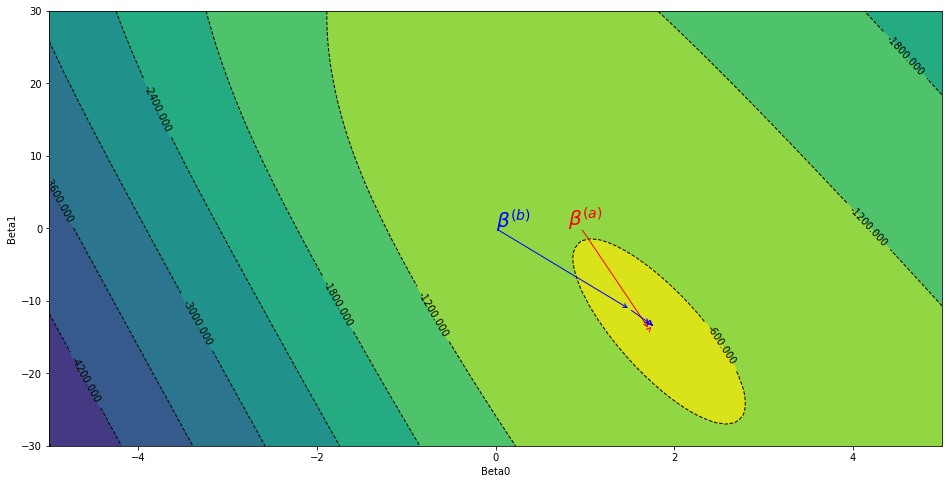

In [8]:
fig = plt.figure(figsize = (16,8))
all_ws1 = np.array(B1)
all_ws2 = np.array(B2)
cp = plt.contour(Beta0, Beta1, loglike, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
for i in range(len(B1) - 1):
    plt.annotate('', xy=all_ws1[i + 1, :], xytext=all_ws1[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
for i in range(len(B2) - 1):
    plt.annotate('', xy=all_ws2[i + 1, :], xytext=all_ws2[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                 va='center', ha='center')
text(0, 1,
     r'$\beta^{(b)}$', verticalalignment='center',
     fontsize=20,color='b')
text(1, 0.25,
     r'$\beta^{(a)}$', horizontalalignment='center',
     fontsize=20,color='red')
cp = plt.contourf(Beta0, Beta1, loglike, )
plt.xlabel('Beta0')
plt.ylabel('Beta1')
plt.show()

# (2)  The following data are an i.i.d. sample from a Cauchy(θ,1) distribution: 1.77,−0.23, 2.76, 3.80, 3.47, 56.75, −1.34, 4.24, −2.44, 3.29, 3.71, −2.40, 4.53, −0.07, −1.05, −13.87,−2.53,−1.75, 0.27, 43.21. 

In [9]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import misc
from sympy import *

In [10]:
x= [1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]

In [11]:
len(x)

20

In [12]:
theta = np.linspace(-100,100,10000)
theta

array([-100.      ,  -99.979998,  -99.959996, ...,   99.959996,
         99.979998,  100.      ])

## a. Graph the log likelihood function. Find the MLE for θ using the Newton–Raphson method. Try all of the following starting points:−11,−1, 0, 1.5, 4, 4.7, 7, 8, and 38. Discuss your results. Is the mean of the data a good starting point? 

In [13]:
def loglikelihood(x,theta):
    l = np.zeros(len(theta))
    for i in range(0,len(theta)):
        for j in range(0,len(x)):
            l[i]+=-np.log(math.pi*(1+(x[j]-theta[i])**2))
    return l

In [14]:
l=loglikelihood(x,theta)

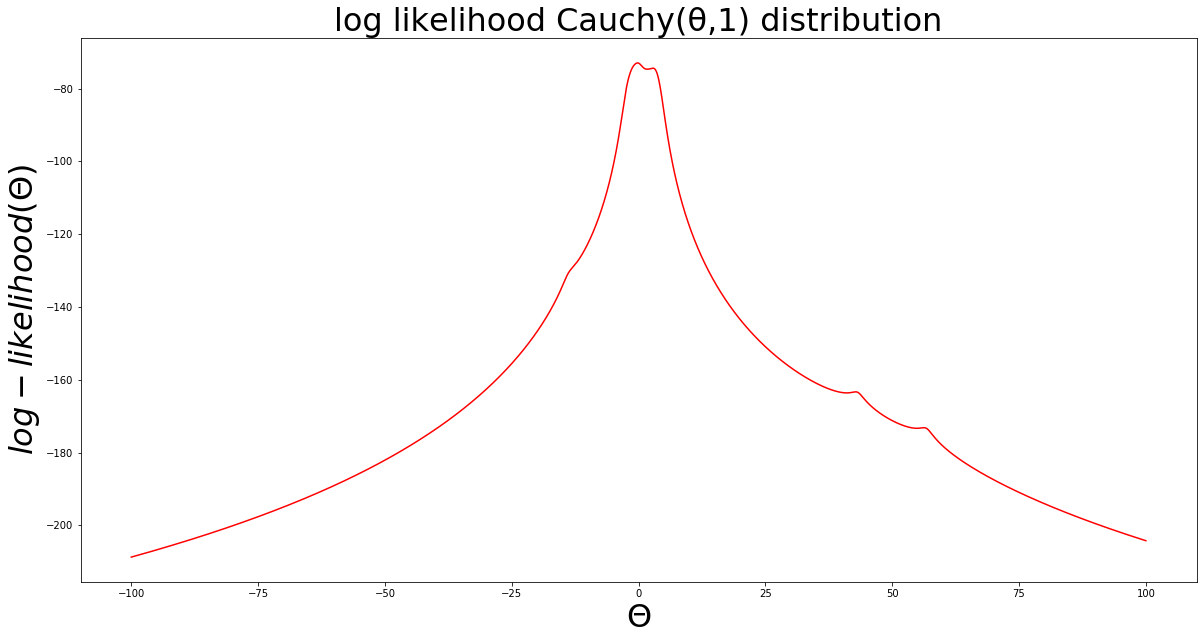

In [15]:
plt.figure(figsize=(20,10))
plt.plot(theta, l,'r-')
plt.title('log likelihood Cauchy(θ,1) distribution',fontsize=32)
plt.xlabel('${\Theta}$',fontsize=32)
plt.ylabel('$log-likelihood({\Theta})$',fontsize=32)
plt.show()

In [16]:
def loglikelihood_prime(theta):
    l_prime =0
    for j in range(0,len(x)):
        l_prime+=2*(theta-x[j])/(1+(x[j]-theta)**2)
    return l_prime

In [17]:
def loglikelihood_doubleprime(theta):
    l_doubleprime = 0
    for j in range(0,len(x)):
        l_doubleprime+=2*(theta**2-2*x[j]*theta+(x[j])**2-1)/((1+(x[j]-theta)**2)**2)
    return l_doubleprime

In [18]:
loglikelihood_prime(1.77)

-0.047884141455019104

In [19]:
loglikelihood_doubleprime(1.77)

0.812852887510148

In [20]:
def newtons_method(f, df, x0, e):
    iteration_counter = 0
    delta = abs(0-f(x0))
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = abs(0-f(x0))
        #print(x0,f(x0))
        iteration_counter += 1
    print ('Root is at: ', x0)
    print ('number of iteration is: ', iteration_counter)
    print ('f(x) at root is: ', f(x0))
    return x0

In [21]:
def loglikelihood_prime_graph(x,theta):
    l_prime_graph = np.zeros(len(theta))
    for i in range(0,len(theta)):
        for j in range(0,len(x)):
            l_prime_graph[i]+=2*(theta[i]-x[j])/(1+(x[j]-theta[i])**2)
    return l_prime_graph

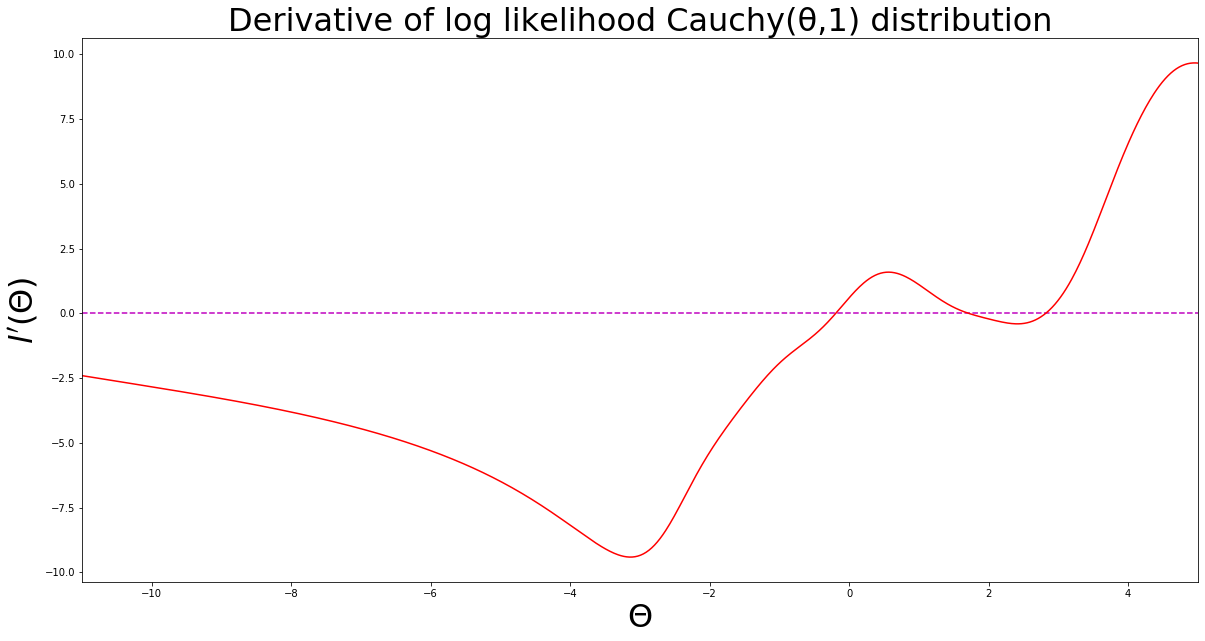

In [22]:
l_prime_graph=loglikelihood_prime_graph(x,theta)
plt.figure(figsize=(20,10))
plt.plot(theta, l_prime_graph,'r-')
plt.title('Derivative of log likelihood Cauchy(θ,1) distribution',fontsize=32)
plt.xlabel('${\Theta}$',fontsize=32)
plt.ylabel('$l^\prime({\Theta})$',fontsize=32)
plt.hlines(y=0,xmin=-11,xmax=5,color='m', linestyle='--')
xlim((-11, 5))
plt.show()

In [23]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, -11, 1e-3)

Root is at:  1.7136903149922922
number of iteration is:  818
f(x) at root is:  -9.190797440702253e-05


1.7136903149922922

In [24]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, -1, 1e-3)

Root is at:  1.7125468758657316
number of iteration is:  875
f(x) at root is:  0.000924565675645514


1.7125468758657316

In [25]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 0, 1e-2)

Root is at:  1.7178325109528987
number of iteration is:  206
f(x) at root is:  -0.003757589403764666


1.7178325109528987

In [26]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 1.5, 1e-2)

Root is at:  1.7246243412031381
number of iteration is:  87
f(x) at root is:  -0.009712852772764742


1.7246243412031381

In [27]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 4, 1e-5)

Root is at:  2.817469916849652
number of iteration is:  410740
f(x) at root is:  -4.937223709908234e-06


2.817469916849652

In [28]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 4.7, 1e-3)

Root is at:  2.8177440107146996
number of iteration is:  7415
f(x) at root is:  0.0005971028067966386


2.8177440107146996

In [29]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 7, 1e-3)

Root is at:  2.8172377398273976
number of iteration is:  5791
f(x) at root is:  -0.0005145159925564122


2.8172377398273976

In [30]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 8, 1e-3)

Root is at:  1.7133818623985
number of iteration is:  11666
f(x) at root is:  0.00018209839693481


1.7133818623985

In [31]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 38, 1e-3)

Root is at:  2.8176453747881474
number of iteration is:  312
f(x) at root is:  0.0003803938428113482


2.8176453747881474

In [32]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, -15, 1e-3)

Root is at:  -0.19255308846001906
number of iteration is:  2144
f(x) at root is:  -0.0008211051848876563


-0.19255308846001906

In [33]:
from scipy.optimize import bisect

sol = bisect(loglikelihood_prime, -1, 1, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (sol))

The root x is approximately x=-0.192286491394,
the error is less than 1e-6.


## b. Apply the bisection method with starting points −1 and 1. Use additional runs to illustrate manners in which the bisection method may fail to ﬁnd the global maximum. 

In [34]:
def bisection(f, x_L, x_R, eps, return_x_list=False):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print ('Error! Function does not have opposite \
                 signs at interval endpoints!')
        sys.exit(1)
    x_M = float(x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1
    if return_x_list:
        x_list = []

    while abs(f_M) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = float(x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter += 1
        if return_x_list:
            x_list.append(x_M)
    if return_x_list:
        return x_list, iteration_counter
    else:
        return x_M, iteration_counter

In [35]:
solution, no_iterations = bisection(loglikelihood_prime, -1, 1, eps=1.0e-6)
print ('Number of function calls: %d' % (1 + 2*no_iterations))
print ('A solution is: %f' % (solution))

Number of function calls: 43
A solution is: -0.192286


In [36]:
solution, no_iterations = bisection(loglikelihood_prime, -1, 10, eps=1.0e-6)
print ('Number of function calls: %d' % (1 + 2*no_iterations))
print ('A solution is: %f' % (solution))

Number of function calls: 47
A solution is: 2.817472


We can see that with different initial values, we may have different results.

## c. Apply ﬁxed-point iterations as in (2.29), starting from −1, with scaling choices of α =1, 0.64, and 0.25. Investigate other choices of starting values and scaling factors. 

In [37]:
def fixed_point(f, df, x, a, e,maxiter):
    iteration = 0
    for i in range(maxiter):
        x0 = x
        x = x + a*df(x)
        iteration+=1 
        if (abs(x-x0)<=e):
            print ('Root is at: ', x)
            print ('number of iteration is: ', iteration)
            print ('f(x) at root is: ', f(x))
            break
        elif iteration == maxiter:
            print("Error: exceeded %d iterations" % maxiter) 


In [38]:
fixed_point( loglikelihood_prime,loglikelihood_doubleprime, -1,1,10e-3,10000)

Root is at:  -3.140578282525543
number of iteration is:  4942
f(x) at root is:  -9.407205411019184


In [39]:
fixed_point( loglikelihood_prime,loglikelihood_doubleprime, -1,0.5,10e-2,10000)

Error: exceeded 10000 iterations


In [40]:
fixed_point( loglikelihood_prime,loglikelihood_doubleprime, -1,0.25,1e-2,70000)

Root is at:  -3.1327189448319936
number of iteration is:  11
f(x) at root is:  -9.407262290267408


In [41]:
fixed_point( loglikelihood_prime,loglikelihood_doubleprime, 1,0.25,1e-3,1000)

Root is at:  2.4118621989881124
number of iteration is:  9
f(x) at root is:  -0.40487634993542426


In [42]:
fixed_point( loglikelihood_prime,loglikelihood_doubleprime, 0,0.25,1e-3,1000)

Root is at:  -3.1352157436916053
number of iteration is:  15
f(x) at root is:  -9.407287395408714


In [43]:
fixed_point( loglikelihood_prime,loglikelihood_doubleprime, -0.5,0.25,1e-3,1000)

Root is at:  -3.135854652235426
number of iteration is:  15
f(x) at root is:  -9.407287338288091


## d. From starting values of $(\theta^{(0)},\theta^{(1)})=(−2,−1)$ apply the secant method to estimate θ. What happens when $(\theta^{(0)},\theta^{(1)})=(−3,3)$, and for other starting choices? 

In [44]:
def secant1(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

In [45]:
secant1(loglikelihood_prime,-2,-1,10000)

Secant method fails.


In [46]:
secant1(loglikelihood_prime,-3,3,10000)

2.8174721655731316

In [47]:
secant1(loglikelihood_prime,-1,1,10000)

-0.19228661322965085

In [48]:
secant1(loglikelihood_prime,-10,10,10000)

-0.19228661322965085

In [49]:
secant1(loglikelihood_prime,-1,5,10000)

-0.19228661322965085

We can calculate the speed of each method:

In [50]:
initial_time = time.time()
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, -15, 1e-3)
newton_method_time = time.time() - initial_time

x_final = bisection(loglikelihood_prime, -1, 1, eps=1.0e-6)
bisection_time = time.time() - initial_time

fixed_point( loglikelihood_prime,loglikelihood_doubleprime, -1,1,10e-3,10000)
fixed_poin_time = time.time() - initial_time

secant1(loglikelihood_prime,-3,3,10000)
secant_time = time.time() - initial_time

print(tabulate([[newton_method_time, bisection_time, fixed_poin_time, secant_time]],headers=["newton_method_time", "bisection_time", "fixed_poin_time", "secant_time"],tablefmt='orgtbl'))

Root is at:  -0.19255308846001906
number of iteration is:  2144
f(x) at root is:  -0.0008211051848876563
Root is at:  -3.140578282525543
number of iteration is:  4942
f(x) at root is:  -9.407205411019184
|   newton_method_time |   bisection_time |   fixed_poin_time |   secant_time |
|----------------------+------------------+-------------------+---------------|
|            0.0698109 |        0.0698109 |          0.152589 |      0.471733 |


## e. Use this example to compare the speed and stability of the Newton–Raphson method, bisection, ﬁxed-point iteration, and the secant method. Do your conclusions change when you apply the methods to a random sample of size 20 from a N(θ,1) distribution? 

In [51]:
def loglikelihood_norm(x,theta):
    l = np.zeros(len(theta))
    for i in range(0,len(theta)):
        for j in range(0,len(x)):
            l[i]+=-np.log(math.sqrt(2*math.pi))-0.5*(((x[j]-theta[i])**2))
    return l

We produce new random sample:

In [52]:
x = np.random.normal(-1, 1, 20)

In [53]:
l_norm=loglikelihood_norm(x,theta)

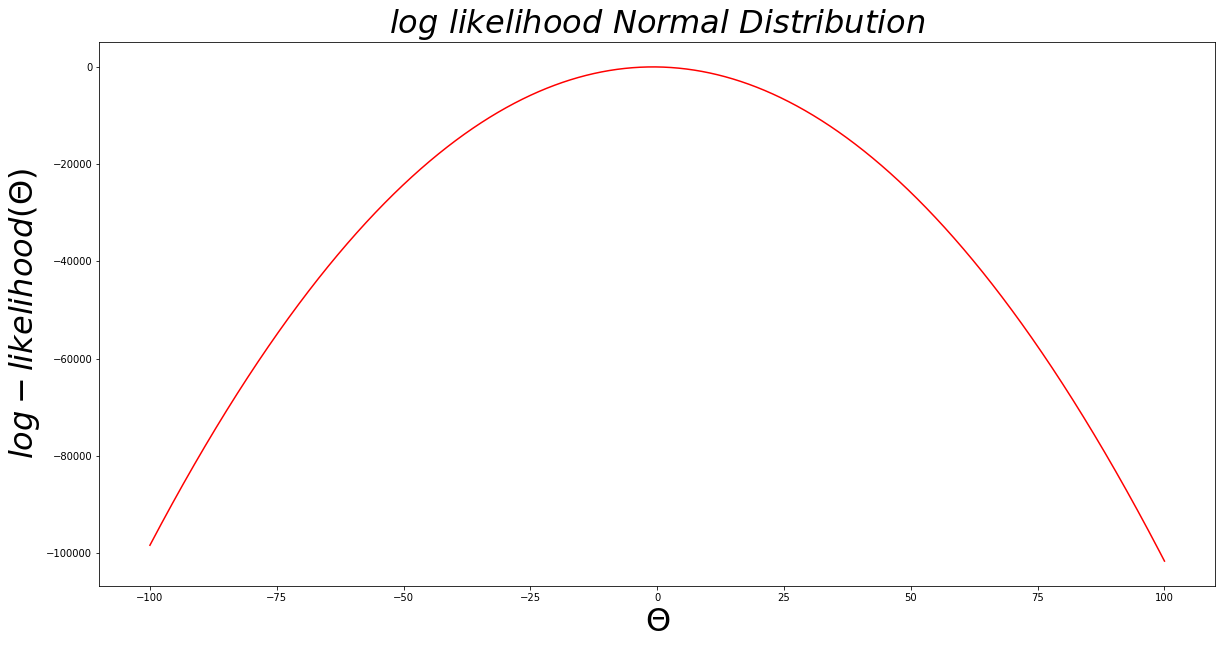

In [54]:
plt.figure(figsize=(20,10))
plt.plot(theta, l_norm,'r-')
plt.title('$log\ likelihood\ Normal\ Distribution$',fontsize=32)
plt.xlabel('${\Theta}$',fontsize=32)
plt.ylabel('$log-likelihood({\Theta})$',fontsize=32)
plt.show()

In [55]:
def loglikelihood_prime_norm(theta):
    l_prime =0
    for j in range(0,len(x)):
        l_prime+=(x[j]-theta)
    return l_prime

In [56]:
def loglikelihood_doubleprime_norm(theta):
    l_doubleprime = -len(x)
    return l_doubleprime

In [57]:
def loglikelihood_prime_norm_graph(x,theta):
    l_prime_graph = np.zeros(len(theta))
    for i in range(0,len(theta)):
        for j in range(0,len(x)):
            l_prime_graph[i]+=(x[j]-theta[i])
    return l_prime_graph

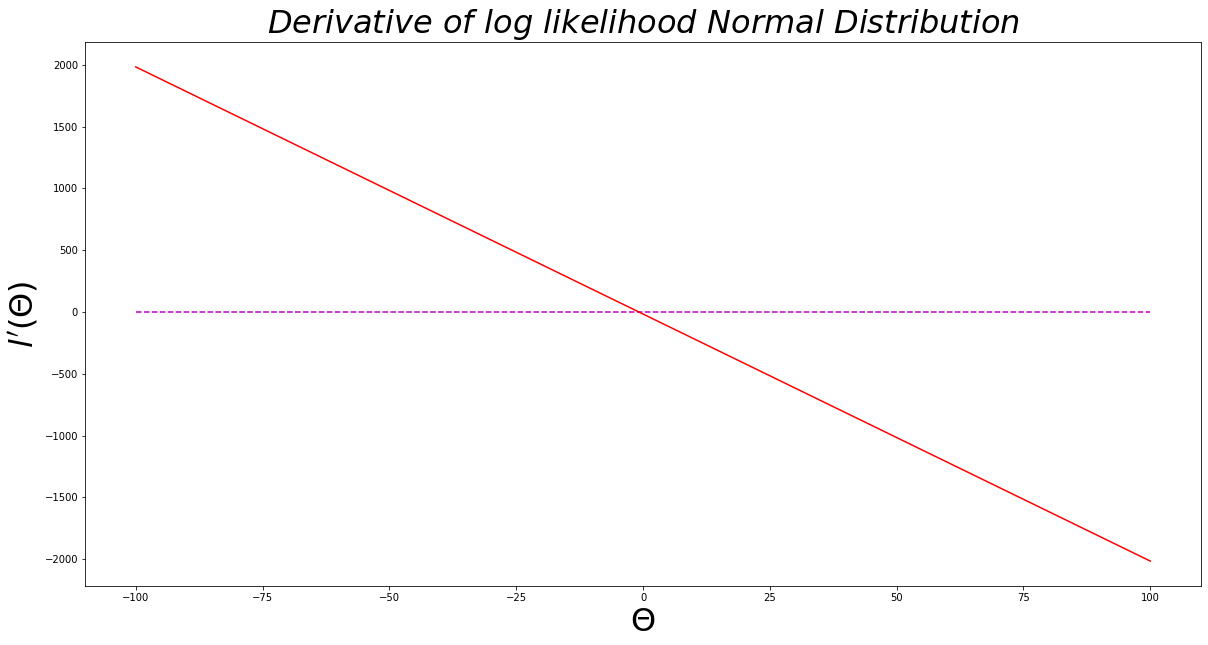

In [58]:
l_prime_graph_norm=loglikelihood_prime_norm_graph(x,theta)

plt.figure(figsize=(20,10))
plt.plot(theta, l_prime_graph_norm,'r-')
plt.title('$Derivative\ of\ log\ likelihood\ Normal\ Distribution$',fontsize=32)
plt.hlines(y=0,xmin=-100,xmax=100,color='m', linestyle='--')

plt.xlabel('${\Theta}$',fontsize=32)
plt.ylabel('$l^\prime({\Theta})$',fontsize=32)
plt.show()

## Newton–Raphson method for normal distribution

In [59]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, -25, 1e-6)

Root is at:  -0.8146208798731962
number of iteration is:  1
f(x) at root is:  4.696243394164412e-14


-0.8146208798731962

In [60]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, -1, 1e-3)

Root is at:  -0.8146208798731939
number of iteration is:  1
f(x) at root is:  1.1102230246251565e-15


-0.8146208798731939

In [61]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 0, 1e-2)

Root is at:  -0.8146208798731939
number of iteration is:  1
f(x) at root is:  1.1102230246251565e-15


-0.8146208798731939

In [62]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 1.5, 1e-2)

Root is at:  -0.8146208798731935
number of iteration is:  1
f(x) at root is:  -6.328271240363392e-15


-0.8146208798731935

In [63]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 4, 1e-5)

Root is at:  -0.8146208798731944
number of iteration is:  1
f(x) at root is:  1.1435297153639112e-14


-0.8146208798731944

In [64]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 4.7, 1e-3)

Root is at:  -0.8146208798731935
number of iteration is:  1
f(x) at root is:  -6.328271240363392e-15


-0.8146208798731935

In [65]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 7, 1e-3)

Root is at:  -0.8146208798731935
number of iteration is:  1
f(x) at root is:  -6.328271240363392e-15


-0.8146208798731935

In [66]:
newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 38, 1e-3)

Root is at:  -0.8146208798731962
number of iteration is:  1
f(x) at root is:  4.696243394164412e-14


-0.8146208798731962

##  Bisection method for normal distribution

In [67]:
solution, no_iterations = bisection(loglikelihood_prime_norm, -10, 10, eps=1.0e-6)
print ('Number of function calls: %d' % (1 + 2*no_iterations))
print ('A solution is: %f' % (solution))

Number of function calls: 51
A solution is: -0.814621


In [68]:
solution, no_iterations = bisection(loglikelihood_prime_norm, -1, 10, eps=1.0e-6)
print ('Number of function calls: %d' % (1 + 2*no_iterations))
print ('A solution is: %f' % (solution))

Number of function calls: 51
A solution is: -0.814621


## Fxed-point iterations for normal distribution

In [69]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, -1, 1, 1e-1, 1000 )

Error: exceeded 1000 iterations


In [70]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, -1,1,10e-3,10000)

Error: exceeded 10000 iterations


In [71]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, -1,0.5,10e-2,10000)

Error: exceeded 10000 iterations


In [72]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, -1,0.25,1e-2,70000)

Error: exceeded 70000 iterations


In [73]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, 1,0.25,1e-3,1000)

Error: exceeded 1000 iterations


In [74]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, 5,0.25,1e-3,1000)

Error: exceeded 1000 iterations


In [75]:
fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, 10,0.25,1e-3,1000)

Error: exceeded 1000 iterations


## Secant method for normal distribution

In [76]:
secant1(loglikelihood_prime_norm,-2,-1,10000)

Secant method fails.


In [77]:
secant1(loglikelihood_prime_norm,-3,3,10000)

-0.8146208798731939

In [78]:
secant1(loglikelihood_prime_norm,-1,1,10000)

-0.8146208798731939

In [79]:
secant1(loglikelihood_prime_norm,-10,10,10000)

-0.8146208798731939

In [80]:
secant1(loglikelihood_prime_norm,-1,15,10000)

-0.8146208798731939

As it was shown, the graph of normal distribution has just one maximum point and finding this point is easier than it for Cauchy distribution which has many local optimum.

Now, for camparison with Cauchy method, we will calculate the speed of each method for normal distribution:

In [81]:
initial_time = time.time()
x_newton_norm=newtons_method(loglikelihood_prime_norm, loglikelihood_doubleprime_norm, 1.5, 1e-3)
newton_method_time_norm = time.time() - initial_time

x_bisection_norm = bisection(loglikelihood_prime_norm, -1, 10, eps=1.0e-6)
bisection_time_norm = time.time() - initial_time

x_fixed_point_norm=fixed_point( loglikelihood_prime_norm,loglikelihood_doubleprime_norm, -1,0.25,10e-2,10000)
fixed_poin_time_norm = time.time() - initial_time

x_secant_norm=secant1(loglikelihood_prime_norm,-1,15,10000)
secant_time_norm = time.time() - initial_time

print(tabulate([[newton_method_time_norm, bisection_time_norm, fixed_poin_time_norm, secant_time_norm]],headers=["newton_method_time_norm", "bisection_time_norm", "fixed_poin_time_norm", "secant_time_norm"],tablefmt='orgtbl'))

Root is at:  -0.8146208798731935
number of iteration is:  1
f(x) at root is:  -6.328271240363392e-15
Error: exceeded 10000 iterations
|   newton_method_time_norm |   bisection_time_norm |   fixed_poin_time_norm |   secant_time_norm |
|---------------------------+-----------------------+------------------------+--------------------|
|                0.00100183 |            0.00100183 |             0.00403142 |           0.435866 |


As it can be seen from the tables, newton method is so fast and the speed of bisection method is good. However, fived point and secant method are slower than two mentioned methods. 

# (3) Problem 2.4 on page 56 of the Computation Statistics book. Required output: A single Plot including (a) the Gamma(2,1) probability density, (2) the lower and the upper end of the interval clearly marked on the x-axis, (3) the region under the density curve and above the between the 95% highest posterior density interval.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.stats import *
from matplotlib.patches import Polygon

First, we create a function intervalWidth that returns the width of the interval that starts at lowTailPr and has credMass mass. The minimum of the intervalWidth function is founded by using the fmin minimizer from scipy.

In [83]:
def HDIofICDF(dist_name, credMass=0.95, **args):
    # freeze distribution with given arguments
    distri = dist_name(**args)
    # initial guess for HDIlowTailPr
    incredMass =  1.0 - credMass

    def intervalWidth(lowTailPr):
        return distri.ppf(credMass + lowTailPr) - distri.ppf(lowTailPr)

    # find lowTailPr that minimizes intervalWidth
    HDIlowTailPr = fmin(intervalWidth, incredMass, ftol=1e-8, disp=False)[0]
    # return interval as array([low, high])
    return distri.ppf([HDIlowTailPr, credMass + HDIlowTailPr])

In [84]:
a=2

We can calculate the lower and the upper end of the interval with 95% confidence

In [85]:
HPDI=HDIofICDF(gamma, credMass=0.95, a=2)
print ('Highest posterior density interval is :',HPDI)

Highest posterior density interval is : [0.0423737  4.76517862]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:604: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:615: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:620: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:608: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:


Now we can plot the Gamma distribution with the lower and the upper end of the interval with 95% confidence:

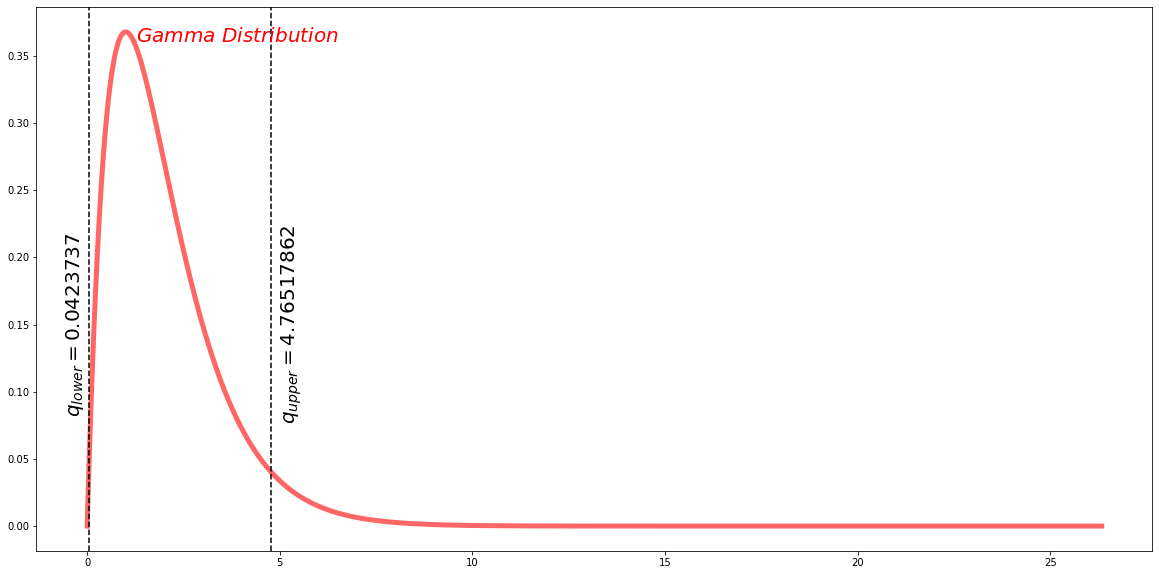

In [86]:
plt.figure(figsize=(20,10))
x = np.linspace(gamma.ppf(0.0000000001, a),gamma.ppf(0.9999999999, a), 1000000)
plt.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')
#plt.legend(loc='best', frameon=False)
plt.axvline(x=HPDI[0],color='k', linestyle='--')
plt.text(-0.6, 0.15,
     r'$q_{lower}=0.0423737$', rotation=90,verticalalignment='center',
     fontsize=20,color='k')
plt.axvline(x=HPDI[1],color='k', linestyle='--')
plt.text(5, 0.15,
     r'$q_{upper}=4.76517862$', rotation=90,verticalalignment='center',
     fontsize=20,color='k')
plt.text(3.9, 0.36,
     r'$Gamma\ Distribution$', horizontalalignment='center',
     fontsize=20,color='red')
#plt.hlines(y=0.0000000001,xmin=-0.5,xmax=25,color='m', linestyle='--')
plt.show()

Now we can plot the Gamma distribution with the lower and the upper end of the interval with 95% confidence the region under the density curve and above the between the 95% highest posterior density interval.

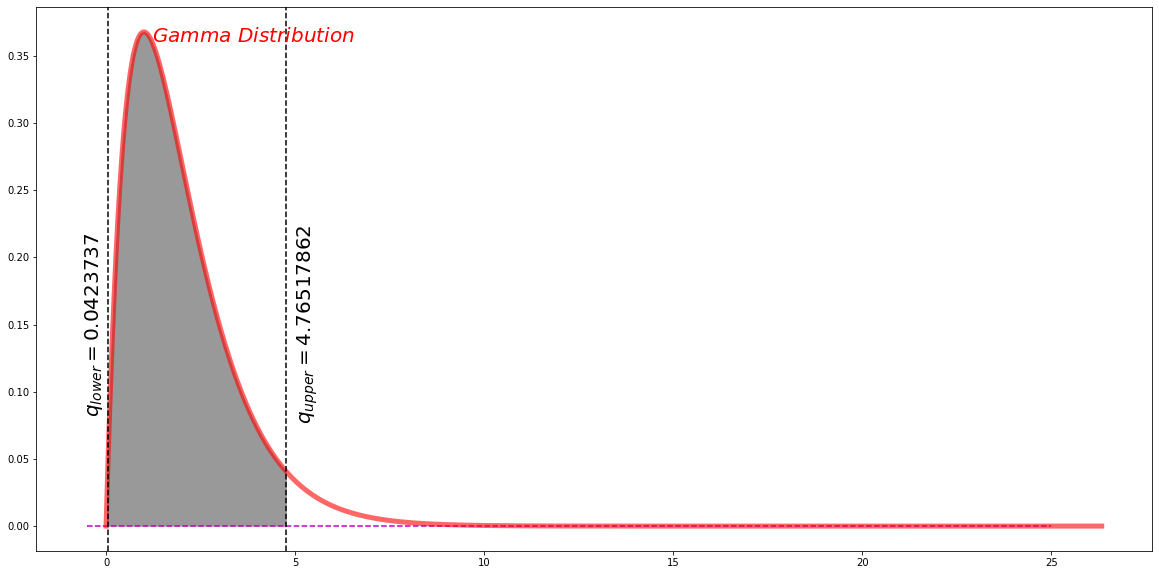

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
ix = np.linspace(HPDI[0], HPDI[1])
iy = gamma.pdf(ix, a)
verts = [(HPDI[0],0), *zip(ix, iy), (HPDI[1], 0)]
poly = Polygon(verts, facecolor='0.6', edgecolor='0.6')
ax.add_patch(poly)
x = np.linspace(gamma.ppf(0.0000000001, a),gamma.ppf(0.9999999999, a), 1000000)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')
#plt.legend(loc='best', frameon=False)
ax.axvline(x=HPDI[0],color='k', linestyle='--')
plt.text(-0.6, 0.15,
     r'$q_{lower}=0.0423737$', rotation=90,verticalalignment='center',
     fontsize=20,color='k')
ax.axvline(x=HPDI[1],color='k', linestyle='--')
plt.text(5, 0.15,
     r'$q_{upper}=4.76517862$', rotation=90,verticalalignment='center',
     fontsize=20,color='k')
ax.text(3.9, 0.36,r'$Gamma\ Distribution$', horizontalalignment='center', fontsize=20,color='red')
ax.hlines(y=0,xmin=-0.5,xmax=25,color='m', linestyle='--')
plt.show()